## What is the optimal geometry for social distancing?

Given the desire to position N people, in 2D space,  while maintaing minimal distance of not closer then 2m, is there an optimal arragement? and if so, what is it, for N=2 to N=10

In [91]:
import numpy as np
import math
import itertools as it

# sample point sets
c3 = 2*math.sin(math.pi/3)
c2 = 2*math.sin(math.pi/4)
sample3 = np.array(((0, 0), (2, 0), (1, c3)))
sample4 = np.array(((0, 0), (2, 0), (0, 2), (2, 2)))
sample4_2 = np.array(((0, 0), (2, 0), (1, c3), (1, -c3)))
sample5 = np.array(((0, 0), (2, 0), (-2, 0), (0, 2), (0, -2)))

sample5_2 = np.array(((0, 0), (2, 0), (1, c3), (1, -c3), (-1, -c3)))
sample5_3 = np.array(((0, 0), (c2, c2), (c2, -c2), (-c2, c2), (-c2, -c2)))
sample5_4 = np.array(((0, 0), (-1, c3), (1, c3), (1, -c3), (-1, -c3)))



sample7 = np.array(((0, 0), (2, 0), (1, c3), (1, -c3), (-2, 0), (-1, c3), (-1, -c3)))


# calc average distance in array
def avgdist(ar):
    sum = 0
    for c in it.combinations(ar, 2):
        d = np.linalg.norm(c[0]-c[1])
        if round(d, 8) < 2:
            return 0
        sum += d
    trig = (ar.shape[0] * (ar.shape[0] - 1)) / 2
    return sum / trig if trig else 0

print("sample3: %s" % str(avgdist(sample3)))
print("sample4: %s" % str(avgdist(sample4)))
print("sample4_2: %s" % str(avgdist(sample4_2)))
print("sample5: %s" % str(avgdist(sample5)))
print("sample5_2: %s" % str(avgdist(sample5_2)))


sample3: 2.0
sample4: 2.2761423749153966
sample4_2: 2.2440169358562922
sample5: 2.731370849898476
sample5_2: 2.4928203230275505


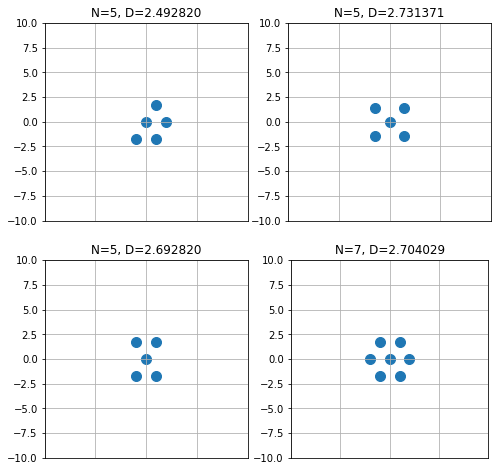

In [100]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2)
def showaxe(axe, ar):
    axe.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    axe.scatter(ar[:,0], ar[:,1], 100)
    axe.set_xlim(-10, 10)
    axe.set_ylim(-10, 10)
    axe.grid()
    fig.gca().set_aspect('equal', adjustable='box')
    fig.set_size_inches(8, 8)
    axe.set_title("N=%d, D=%f" % (ar.shape[0], avgdist(ar)))

    
    
showaxe(axs[0][0], sample5_2)
showaxe(axs[0][1], sample5_3)
showaxe(axs[1][0], sample5_4)
showaxe(axs[1][1], sample7)

In [136]:
import statistics as st
points = [(0,0)]

# minimun distance of a point form each element of an array
def minDist(pt, ar):
    return min([distance.euclidean(pt, pt2) for pt2 in ar])

# mean distance between all combibations of two elements of an array
def meanDist(ar):
    return st.mean([distance.euclidean(c[0], c[1]) for c in it.combinations(ar, 2)])

# mean distance between all combibations of and first element of an array
def mean0Dist(ar):
    ar = list(ar)
    return st.mean([distance.euclidean(ar[0], pt) for pt in ar[1:]])

# mean distance between all combibations of two elements of an array
def maxDist(ar):
    return max([distance.euclidean(c[0], c[1]) for c in it.combinations(ar, 2)])

# return a radial point
def radPoint(center, angle, magnitude):
    x = center[0] + math.cos(angle) * magnitude
    y = center[1] + math.sin(angle) * magnitude
    return (x, y)
    
# find best point along a directional vector from a center point in relationship to other points in the array
def bestPointOnRadial(points, center, angle, thresholdDist):
    
    # determine first magnitude that is valid using steps of a portion of the thresholdDist
    resolution = 100.0
    step = thresholdDist / resolution
    mag = step
    point = radPoint(center, angle, mag)
    while minDist(point, points) < thresholdDist:
        mag += step
        point = radPoint(center, angle, mag)
        
    # todo: step back on mag, using lion-in-the-desert, 
        
    return point

def bestPointOnAllRadials(points, center, thresholdDist):
    
    resolution = 60.0
    step = 2 * math.pi / resolution
    angle = 0
    bestPt = None
    while angle < 2 * math.pi:
        pt = bestPointOnRadial(points, center, angle, thresholdDist)
        dist = meanDist(it.chain(points, [pt]))
        if not bestPt or dist < bestDist:
            bestPt = pt
            bestDist = dist
        angle += step
            
    return bestPt
        
pt = bestPointOnAllRadials(points, points[0], 2)
print(pt)

(2.0000000000000013, 0.0)


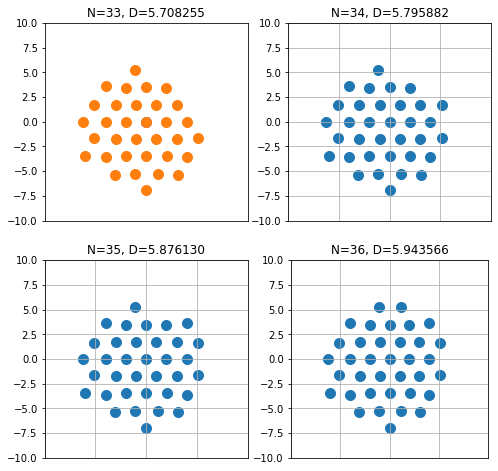

In [137]:
points = [(0,0)]
dim = 36
fig, axs = plt.subplots(2, 2)
showaxe(axs[0][0], np.array(points))
while len(points) < dim:
    pt = bestPointOnAllRadials(points, points[0], 2)
    points.append(pt)
    i = len(points) - 1
    if i >= dim - 4:
        row = (i + 4 - dim) // 2
        col = (i + 4 - dim) - 2 * row
        showaxe(axs[row][col], np.array(points))


